# Exploitation Comparison of Different Zero-sum Game Methods
The figures show the learning curve of the exploiter after the model is trained with different type of methods. The exploiter is set as the second player for all envs and methods.

In [38]:
import json

def load_data(file_name):
    file_dir = folder+files[0]
    file_dir = folder+file_name
    print(file_dir)
    
    data = json.load( open(file_dir+"/process.json"))
    print(data.keys())
    return data

In [39]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['savefig.facecolor']='white'
# plt.style.use('seaborn-whitegrid')
plt.style.use('default')
import matplotlib.cm as cm


def plot(data, method, color, agent_to_plot, smooth_radius=200, range=100000):
    def smooth(y, radius=200, mode='two_sided'):
        if len(y) < 2*radius+1:
            return np.ones_like(y) * y.mean()
        elif mode == 'two_sided':
            convkernel = np.ones(2 * radius+1)
            return np.convolve(y, convkernel, mode='same') / \
                   np.convolve(np.ones_like(y), convkernel, mode='same')
        elif mode == 'causal':
            convkernel = np.ones(radius)
            out = np.convolve(y, convkernel,mode='full') / \
                  np.convolve(np.ones_like(y), convkernel, mode='full')
            return out[:-radius+1]

    k = method
    v = data[agent_to_plot]
    plt.plot(v[:range], color=color, alpha=0.2)
    plt.plot(smooth(v[:range], radius=smooth_radius), color=color, label=k)

    
img_path = 'generated_img/'

## 1. Symmetric
Some methods are symmetric for two sides, like selfplay, fictitious selfplay.

* Methods: selfplay, fictitious selfplay, nfsp, nash_dqn, nash_dqn_exploiter
* Env: pettingzoo-boxing

['pettingzoo_boxing_v1_fictitious_selfplay', 'pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_boxing_v1_nfsp', 'pettingzoo_boxing_v1_selfplay', 'pettingzoo_surround_v1_fictitious_selfplay', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nfsp', 'pettingzoo_surround_v1_selfplay']
['pettingzoo_boxing_v1_fictitious_selfplay', 'pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_boxing_v1_nfsp', 'pettingzoo_boxing_v1_selfplay']
log/20211109_1530_exploit/pettingzoo_boxing_v1_fictitious_selfplay
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211109_1530_exploit/pettingzoo_boxing_v1_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211109_1530_exploit/pettingzoo_boxing_v1_nash_dqn_exploiter
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211109_1530_exploit/pettingzoo_boxing_v1_nfsp
dict_keys(['episode_reward', 'los

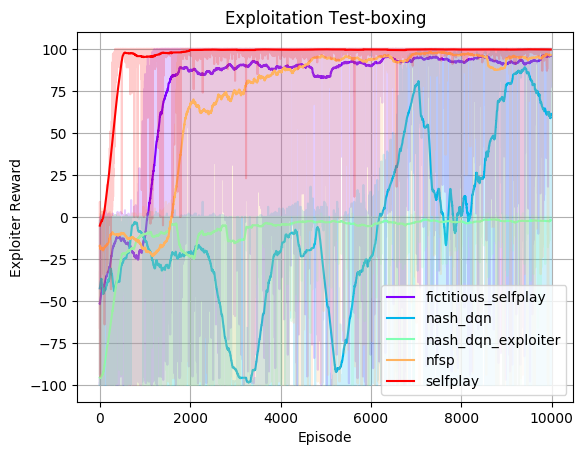

In [41]:
env = 'boxing'
folder = 'log/20211109_1530_exploit/'
files = ! ls $folder
print(files)
colors = cm.rainbow(np.linspace(0, 1, 5))
# colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
env_files =[f for f in files if env in f]
print(env_files)

for f, c in zip(env_files, colors):
    data = load_data(f)
    method = f.split('v1_')[-1]
    plot(data['episode_reward'], method, c, agent_to_plot, smooth_radius=200)

plt.legend()
plt.grid()
plt.title(f'Exploitation Test-{env}')
plt.xlabel('Episode')
plt.ylabel('Exploiter Reward')
savepath=f'generated_img/compare_exploitation_{env}.pdf'
plt.savefig(savepath, bbox_inches='tight',)

* Methods: selfplay, fictitious selfplay, nfsp, nash_dqn, nash_dqn_exploiter
* Env: pettingzoo-surround

* Results: no method is unexploitable.

['pettingzoo_boxing_v1_fictitious_selfplay', 'pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_boxing_v1_nfsp', 'pettingzoo_boxing_v1_selfplay', 'pettingzoo_surround_v1_fictitious_selfplay', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nfsp', 'pettingzoo_surround_v1_selfplay']
['pettingzoo_surround_v1_fictitious_selfplay', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nfsp', 'pettingzoo_surround_v1_selfplay']
log/20211109_1530_exploit/pettingzoo_surround_v1_fictitious_selfplay
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211109_1530_exploit/pettingzoo_surround_v1_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211109_1530_exploit/pettingzoo_surround_v1_nash_dqn_exploiter
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211109_1530_exploit/pettingzoo_surround_v1_nfsp
dict_keys(['epi

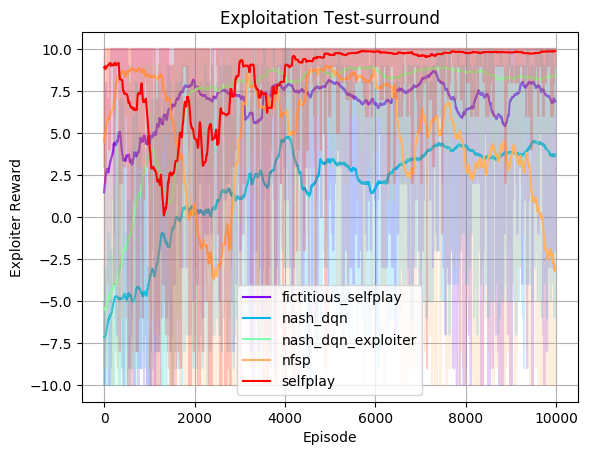

In [42]:
env = 'surround'
folder = 'log/20211109_1530_exploit/'
files = ! ls $folder
print(files)
# colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
colors = cm.rainbow(np.linspace(0, 1, 5))
agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
env_files =[f for f in files if env in f]
print(env_files)

for f, c in zip(env_files, colors):
    data = load_data(f)
    method = f.split('v1_')[-1]
    plot(data['episode_reward'], method, c, agent_to_plot, smooth_radius=200)

plt.legend()
plt.grid()
plt.title(f'Exploitation Test-{env}')
plt.xlabel('Episode')
plt.ylabel('Exploiter Reward')
savepath=f'generated_img/compare_exploitation_{env}.pdf'
plt.savefig(savepath, bbox_inches='tight',)

## 2. Asymmetric
Those symmetric methods are modified to be asymmetric for two sides (each side has a model class), for methods like selfplay, fictitious_selfplay, nxdo, so the modified two-side versions are called selfplay2, fictitious_selfplay2, nxdo2.

Other changes:
* nash_dqn, nash_dqn_exploiter use only observation from agent1, assuming single-side observation conctains full env state information (fully-observable env) due to env symmetricity.
* the additional indicator on observation is removed for the change from symmetric methods to asymmetric ones.

Summary:

* Methods: selfplay2, fictitious_selfplay2, nxdo2, nfsp, nash_dqn, nash_dqn_exploiter
* Env: pettingzoo-boxing

['pettingzoo_boxing_v1_fictitious_selfplay2', 'pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_boxing_v1_nfsp', 'pettingzoo_boxing_v1_nxdo2', 'pettingzoo_boxing_v1_selfplay2', 'pettingzoo_surround_v1_fictitious_selfplay2', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nfsp', 'pettingzoo_surround_v1_nxdo2', 'pettingzoo_surround_v1_selfplay2']
['pettingzoo_boxing_v1_fictitious_selfplay2', 'pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_boxing_v1_nfsp', 'pettingzoo_boxing_v1_nxdo2', 'pettingzoo_boxing_v1_selfplay2']
log/20211120_1257_exploit/pettingzoo_boxing_v1_fictitious_selfplay2
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211120_1257_exploit/pettingzoo_boxing_v1_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211120_1257_exploit/pettingzoo_boxing_v1_nash_dqn_exploiter
dict_keys(['episode_reward', 'loss', 'epis

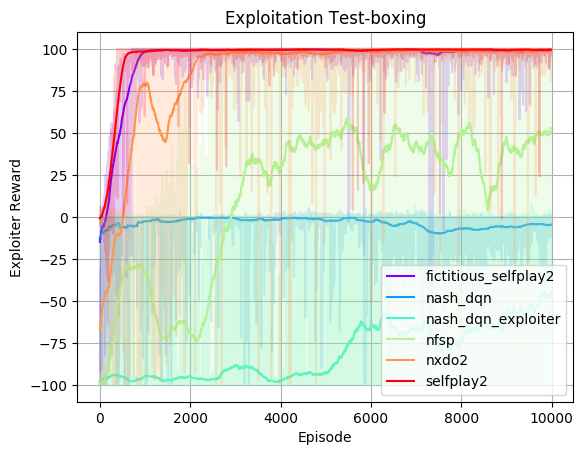

In [15]:
# selfplay2, ficitious_selfplay2
env = 'boxing'
folder = 'log/20211120_1257_exploit/'
files = ! ls $folder
print(files)
colors = cm.rainbow(np.linspace(0, 1, 6))
# colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
env_files =[f for f in files if env in f]
print(env_files)

for f, c in zip(env_files, colors):
    data = load_data(f)
    method = f.split('v1_')[-1]
    plot(data['episode_reward'], method, c, agent_to_plot, smooth_radius=200)

plt.legend()
plt.grid()
plt.title(f'Exploitation Test-{env}')
plt.xlabel('Episode')
plt.ylabel('Exploiter Reward')
savepath=f'generated_img/compare_exploitation_{env}2.pdf'
plt.savefig(savepath, bbox_inches='tight',)

Summary:
* Methods: selfplay2, fictitious selfplay2, nxdo2, nfsp, nash_dqn, nash_dqn_exploiter
* Env: pettingzoo-surround

Results:
* All methods are still exploited for this env.

['pettingzoo_boxing_v1_fictitious_selfplay2', 'pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_boxing_v1_nfsp', 'pettingzoo_boxing_v1_nxdo2', 'pettingzoo_boxing_v1_selfplay2', 'pettingzoo_surround_v1_fictitious_selfplay2', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nfsp', 'pettingzoo_surround_v1_nxdo2', 'pettingzoo_surround_v1_selfplay2']
['pettingzoo_surround_v1_fictitious_selfplay2', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nfsp', 'pettingzoo_surround_v1_nxdo2', 'pettingzoo_surround_v1_selfplay2']
log/20211120_1257_exploit/pettingzoo_surround_v1_fictitious_selfplay2
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211120_1257_exploit/pettingzoo_surround_v1_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211120_1257_exploit/pettingzoo_surround_v1_nash_dqn_exploiter
dict_keys(['episode_rewa

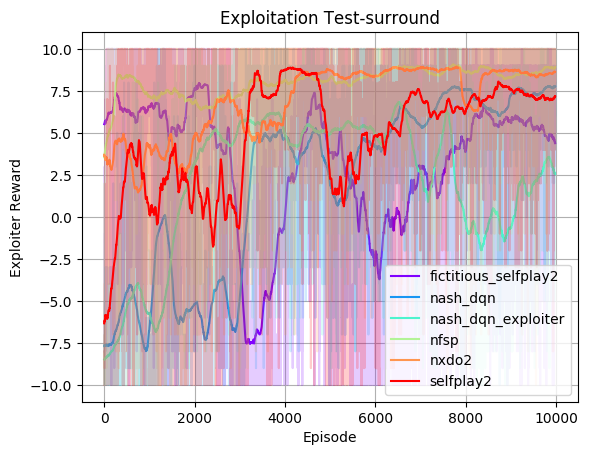

In [16]:
# selfplay2, ficitious_selfplay2
env = 'surround'
folder = 'log/20211120_1257_exploit/'
files = ! ls $folder
print(files)
colors = cm.rainbow(np.linspace(0, 1, 6))
# colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
env_files =[f for f in files if env in f]
print(env_files)

for f, c in zip(env_files, colors):
    data = load_data(f)
    method = f.split('v1_')[-1]
    plot(data['episode_reward'], method, c, agent_to_plot, smooth_radius=200)

plt.legend()
plt.grid()
plt.title(f'Exploitation Test-{env}')
plt.xlabel('Episode')
plt.ylabel('Exploiter Reward')
savepath=f'generated_img/compare_exploitation_{env}2.pdf'
plt.savefig(savepath, bbox_inches='tight',)

['pettingzoo_boxing_v1_fictitious_selfplay2', 'pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_boxing_v1_nash_ppo', 'pettingzoo_boxing_v1_selfplay', 'pettingzoo_boxing_v1_selfplay2', 'pettingzoo_boxingv1_selfplay_dqn', 'pettingzoo_combat_plane_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_selfplay']
['pettingzoo_boxing_v1_fictitious_selfplay2', 'pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_boxing_v1_nash_ppo', 'pettingzoo_boxing_v1_selfplay', 'pettingzoo_boxing_v1_selfplay2', 'pettingzoo_boxingv1_selfplay_dqn']
log/0/pettingzoo_boxing_v1_fictitious_selfplay2
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/0/pettingzoo_boxing_v1_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/0/pettingzoo_boxing_v1_nash_dqn_exploiter
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/0/pettingzoo_boxing_v1_nash_

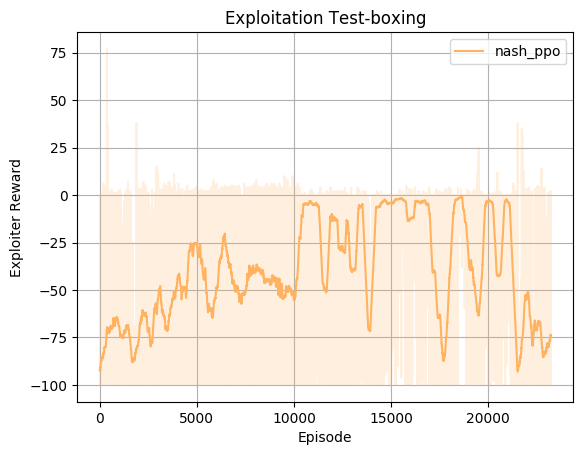

In [47]:
env = 'boxing'
folder = 'log/0/'
files = ! ls $folder
test_method = 'nash_ppo'
print(files)
colors = cm.rainbow(np.linspace(0, 1, 5))
# colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
env_files =[f for f in files if env in f]
print(env_files)

for f, c in zip(env_files, colors):
    data = load_data(f)
    method = f.split('v1_')[-1]
    if method == test_method:
        plot(data['episode_reward'], method, c, agent_to_plot, smooth_radius=200)

plt.legend()
plt.grid()
plt.title(f'Exploitation Test-{env}')
plt.xlabel('Episode')
plt.ylabel('Exploiter Reward')
savepath=f'generated_img/exploitation_{env}_{test_method}.pdf'
plt.savefig(savepath, bbox_inches='tight',)

A larger net makes nash_ppo unexploitable on surround, from 64 -> 256 per layer, 64 is exploitable.

['pettingzoo_boxing_v1_fictitious_selfplay2', 'pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_boxing_v1_nash_ppo', 'pettingzoo_boxing_v1_selfplay', 'pettingzoo_boxing_v1_selfplay2', 'pettingzoo_boxingv1_selfplay_dqn', 'pettingzoo_combat_plane_v1_nash_dqn', 'pettingzoo_combat_plane_v1_nash_ppo', 'pettingzoo_ice_hockey_v1_nash_ppo', 'pettingzoo_pong_v2_nash_ppo', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nash_ppo', 'pettingzoo_surround_v1_selfplay', 'pettingzoo_tennis_v2_nash_ppo']
['pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nash_ppo', 'pettingzoo_surround_v1_selfplay']
log/0/pettingzoo_surround_v1_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/0/pettingzoo_surround_v1_nash_dqn_exploiter
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/0/pettingzoo_surround_v1_nash_ppo
dict_keys(['episode_reward

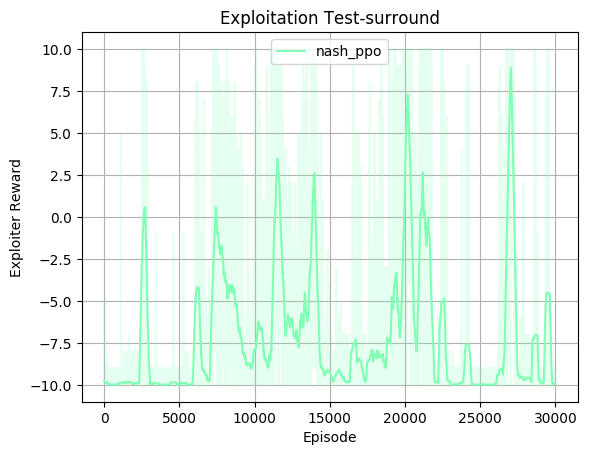

In [13]:
env = 'surround'
folder = 'log/0/'  # learned model with 256 hidden units per layer, exploiter 64
files = ! ls $folder
test_method = 'nash_ppo'
print(files)
colors = cm.rainbow(np.linspace(0, 1, 5))
# colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
env_files =[f for f in files if env in f]
print(env_files)

for f, c in zip(env_files, colors):
    data = load_data(f)
    method = f.split('v1_')[-1]
    if method == test_method:
        plot(data['episode_reward'], method, c, agent_to_plot, smooth_radius=200)

plt.legend()
plt.grid()
plt.title(f'Exploitation Test-{env}')
plt.xlabel('Episode')
plt.ylabel('Exploiter Reward')
savepath=f'generated_img/exploitation_{env}_{test_method}.pdf'
plt.savefig(savepath, bbox_inches='tight',)

Tennis env requires reward filter to ensure zero-sum.

['pettingzoo_boxing_v1_fictitious_selfplay2', 'pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_boxing_v1_nash_ppo', 'pettingzoo_boxing_v1_selfplay', 'pettingzoo_boxing_v1_selfplay2', 'pettingzoo_boxingv1_selfplay_dqn', 'pettingzoo_combat_plane_v1_nash_dqn', 'pettingzoo_combat_plane_v1_nash_ppo', 'pettingzoo_pong_v2_nash_ppo', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nash_ppo', 'pettingzoo_surround_v1_selfplay', 'pettingzoo_tennis_v2_nash_ppo']
['pettingzoo_tennis_v2_nash_ppo']
log/0/pettingzoo_tennis_v2_nash_ppo
dict_keys(['episode_reward', 'loss', 'episode_length'])


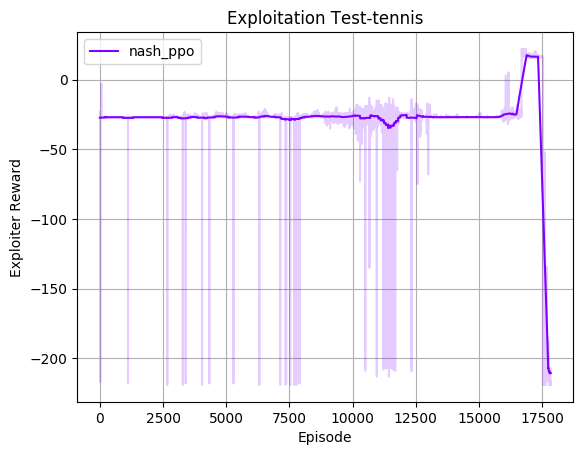

In [7]:
env = 'tennis'
folder = 'log/0/'   # without reward filter, not zero-sum in the end
files = ! ls $folder
test_method = 'nash_ppo'
print(files)
colors = cm.rainbow(np.linspace(0, 1, 5))
# colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
env_files =[f for f in files if env in f]
print(env_files)

for f, c in zip(env_files, colors):
    data = load_data(f)
    method = f.split('v2_')[-1]
    if method == test_method:
        plot(data['episode_reward'], method, c, agent_to_plot, smooth_radius=200)

plt.legend()
plt.grid()
plt.title(f'Exploitation Test-{env}')
plt.xlabel('Episode')
plt.ylabel('Exploiter Reward')
savepath=f'generated_img/exploitation_{env}_{test_method}.pdf'
plt.savefig(savepath, bbox_inches='tight',)

['pettingzoo_boxing_v1_fictitious_selfplay2', 'pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_boxing_v1_nash_ppo', 'pettingzoo_boxing_v1_selfplay', 'pettingzoo_boxing_v1_selfplay2', 'pettingzoo_boxingv1_selfplay_dqn', 'pettingzoo_combat_plane_v1_nash_dqn', 'pettingzoo_combat_plane_v1_nash_ppo', 'pettingzoo_ice_hockey_v1_nash_ppo', 'pettingzoo_pong_v2_nash_ppo', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nash_ppo', 'pettingzoo_surround_v1_selfplay', 'pettingzoo_tennis_v2_nash_ppo']
['pettingzoo_tennis_v2_nash_ppo']
log/0/pettingzoo_tennis_v2_nash_ppo
dict_keys(['episode_reward', 'loss', 'episode_length'])


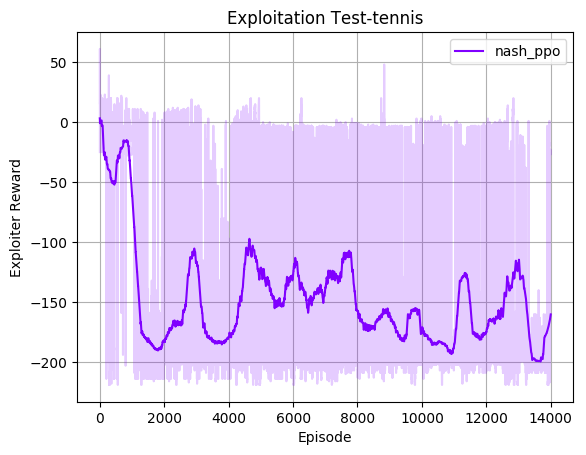

In [14]:
env = 'tennis'
folder = 'log/0/'  # with reward filter, guaranteed zero-sum
files = ! ls $folder
test_method = 'nash_ppo'
print(files)
colors = cm.rainbow(np.linspace(0, 1, 5))
# colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
env_files =[f for f in files if env in f]
print(env_files)

for f, c in zip(env_files, colors):
    data = load_data(f)
    method = f.split('v2_')[-1]
    if method == test_method:
        plot(data['episode_reward'], method, c, agent_to_plot, smooth_radius=200)

plt.legend()
plt.grid()
plt.title(f'Exploitation Test-{env}')
plt.xlabel('Episode')
plt.ylabel('Exploiter Reward')
savepath=f'generated_img/exploitation_{env}_{test_method}.pdf'
plt.savefig(savepath, bbox_inches='tight',)

['pettingzoo_combat_tank_v1_nash_dqn', 'pettingzoo_combat_tank_v1_nash_dqn_exploiter', 'pettingzoo_combat_tank_v1_nash_ppo', 'pettingzoo_combat_tank_v1_nfsp', 'pettingzoo_ice_hockey_v1_nash_dqn', 'pettingzoo_ice_hockey_v1_nash_dqn_exploiter', 'pettingzoo_ice_hockey_v1_nash_ppo', 'pettingzoo_ice_hockey_v1_nfsp', 'pettingzoo_ice_hockey_v1_nxdo2', 'pettingzoo_ice_hockey_v1_selfplay2']
['pettingzoo_combat_tank_v1_nash_dqn', 'pettingzoo_combat_tank_v1_nash_dqn_exploiter', 'pettingzoo_combat_tank_v1_nash_ppo', 'pettingzoo_combat_tank_v1_nfsp']
log/20211205_2241_exploit/pettingzoo_combat_tank_v1_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211205_2241_exploit/pettingzoo_combat_tank_v1_nash_dqn_exploiter
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211205_2241_exploit/pettingzoo_combat_tank_v1_nash_ppo
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211205_2241_exploit/pettingzoo_combat_tank_v1_nfsp
dict_keys(['episode_reward', 'loss', '

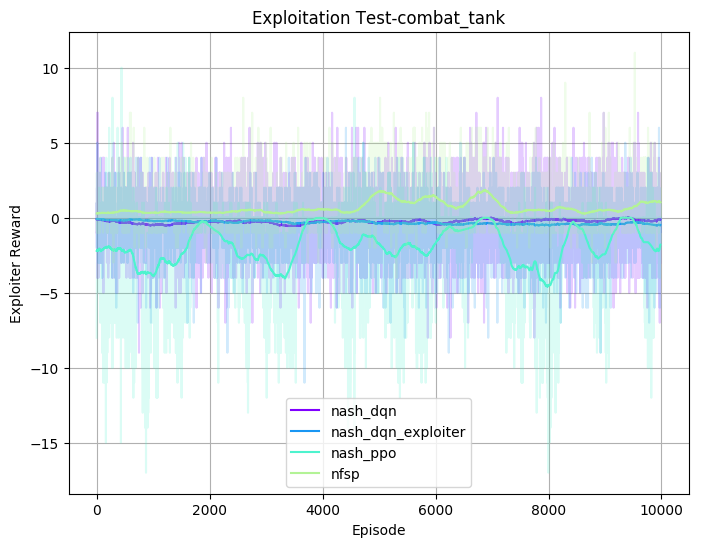

In [15]:
env = 'combat_tank'
folder = 'log/20211205_2241_exploit/'
files = ! ls $folder
print(files)
colors = cm.rainbow(np.linspace(0, 1, 6))
# colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
env_files =[f for f in files if env in f]
print(env_files)

for f, c in zip(env_files, colors):
    data = load_data(f)
    method = f.split('v1_')[-1]
    plot(data['episode_reward'], method, c, agent_to_plot, smooth_radius=200)

plt.legend()
plt.grid()
plt.title(f'Exploitation Test-{env}')
plt.xlabel('Episode')
plt.ylabel('Exploiter Reward')
savepath=f'generated_img/compare_exploitation_{env}.pdf'
plt.savefig(savepath, bbox_inches='tight',)

['pettingzoo_combat_tank_v1_nash_dqn', 'pettingzoo_combat_tank_v1_nash_dqn_exploiter', 'pettingzoo_combat_tank_v1_nash_ppo', 'pettingzoo_combat_tank_v1_nfsp', 'pettingzoo_ice_hockey_v1_nash_dqn', 'pettingzoo_ice_hockey_v1_nash_dqn_exploiter', 'pettingzoo_ice_hockey_v1_nash_ppo', 'pettingzoo_ice_hockey_v1_nfsp', 'pettingzoo_ice_hockey_v1_nxdo2', 'pettingzoo_ice_hockey_v1_selfplay2']
['pettingzoo_ice_hockey_v1_nash_dqn', 'pettingzoo_ice_hockey_v1_nash_dqn_exploiter', 'pettingzoo_ice_hockey_v1_nash_ppo', 'pettingzoo_ice_hockey_v1_nfsp', 'pettingzoo_ice_hockey_v1_nxdo2', 'pettingzoo_ice_hockey_v1_selfplay2']
log/20211205_2241_exploit/pettingzoo_ice_hockey_v1_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211205_2241_exploit/pettingzoo_ice_hockey_v1_nash_dqn_exploiter
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211205_2241_exploit/pettingzoo_ice_hockey_v1_nash_ppo
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211205_2241_exploit/pett

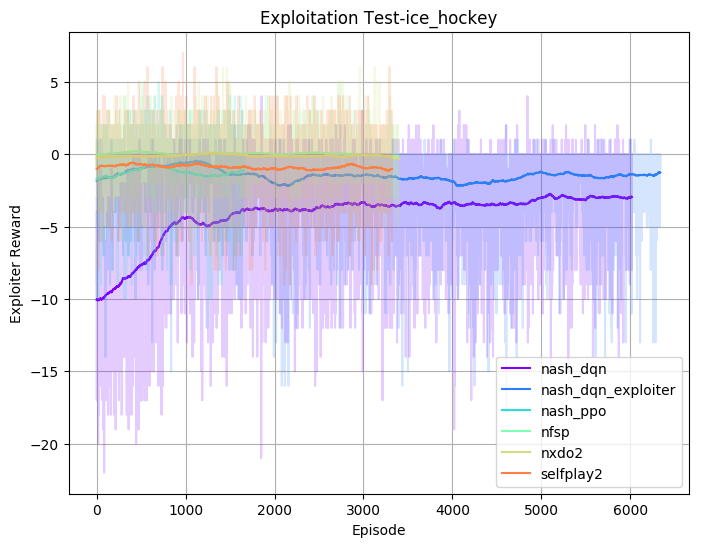

In [40]:
env = 'ice_hockey'
folder = 'log/20211205_2241_exploit/'
files = ! ls $folder
print(files)
colors = cm.rainbow(np.linspace(0, 1, 7))
# colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
env_files =[f for f in files if env in f]
print(env_files)
plt.rcParams["figure.figsize"] = (8,6)

for f, c in zip(env_files, colors):
    data = load_data(f)
    method = f.split('v1_')[-1]
    plot(data['episode_reward'], method, c, agent_to_plot, smooth_radius=200)

plt.legend()
plt.grid()
plt.title(f'Exploitation Test-{env}')
plt.xlabel('Episode')
plt.ylabel('Exploiter Reward')
savepath=f'generated_img/compare_exploitation_{env}.pdf'
plt.savefig(savepath, bbox_inches='tight',)

['pettingzoo_surround_v1_fictitious_selfplay2', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nash_ppo', 'pettingzoo_surround_v1_nfsp', 'pettingzoo_surround_v1_nxdo2', 'pettingzoo_surround_v1_selfplay2', 'pettingzoo_tennis_v2_fictitious_selfplay2', 'pettingzoo_tennis_v2_nash_dqn', 'pettingzoo_tennis_v2_nash_dqn_exploiter', 'pettingzoo_tennis_v2_nash_ppo', 'pettingzoo_tennis_v2_nfsp', 'pettingzoo_tennis_v2_nxdo2', 'pettingzoo_tennis_v2_selfplay2']
['pettingzoo_surround_v1_fictitious_selfplay2', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nash_ppo', 'pettingzoo_surround_v1_nfsp', 'pettingzoo_surround_v1_nxdo2', 'pettingzoo_surround_v1_selfplay2']
log/20211205_2243_exploit/pettingzoo_surround_v1_fictitious_selfplay2
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211205_2243_exploit/pettingzoo_surround_v1_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode

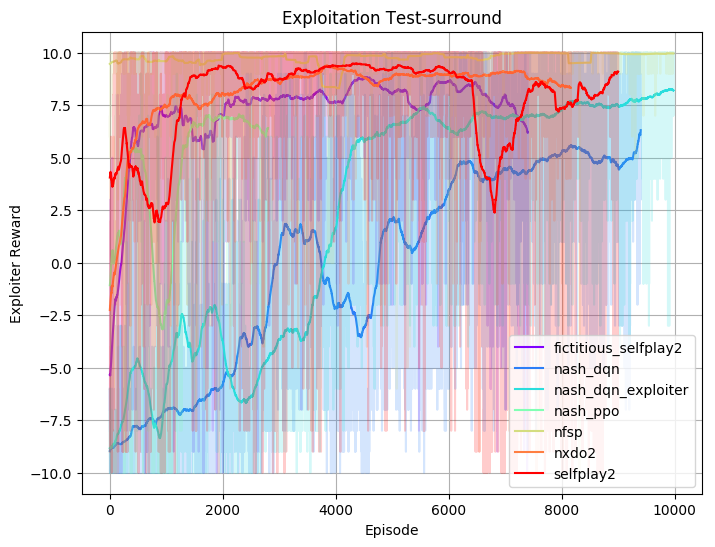

In [44]:
env = 'surround'
folder = 'log/20211205_2243_exploit/'
files = ! ls $folder
print(files)
colors = cm.rainbow(np.linspace(0, 1, 7))
# colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
env_files =[f for f in files if env in f]
print(env_files)
plt.rcParams["figure.figsize"] = (8,6)

for f, c in zip(env_files, colors):
    data = load_data(f)
    method = f.split('v1_')[-1]
    plot(data['episode_reward'], method, c, agent_to_plot, smooth_radius=200)

plt.legend()
plt.grid()
plt.title(f'Exploitation Test-{env}')
plt.xlabel('Episode')
plt.ylabel('Exploiter Reward')
savepath=f'generated_img/compare_exploitation_{env}.pdf'
plt.savefig(savepath, bbox_inches='tight',)

['pettingzoo_surround_v1_fictitious_selfplay2', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nash_ppo', 'pettingzoo_surround_v1_nfsp', 'pettingzoo_surround_v1_nxdo2', 'pettingzoo_surround_v1_selfplay2', 'pettingzoo_tennis_v2_fictitious_selfplay2', 'pettingzoo_tennis_v2_nash_dqn', 'pettingzoo_tennis_v2_nash_dqn_exploiter', 'pettingzoo_tennis_v2_nash_ppo', 'pettingzoo_tennis_v2_nfsp', 'pettingzoo_tennis_v2_nxdo2', 'pettingzoo_tennis_v2_selfplay2']
['pettingzoo_tennis_v2_fictitious_selfplay2', 'pettingzoo_tennis_v2_nash_dqn', 'pettingzoo_tennis_v2_nash_dqn_exploiter', 'pettingzoo_tennis_v2_nash_ppo', 'pettingzoo_tennis_v2_nfsp', 'pettingzoo_tennis_v2_nxdo2', 'pettingzoo_tennis_v2_selfplay2']
log/20211205_2243_exploit/pettingzoo_tennis_v2_fictitious_selfplay2
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/20211205_2243_exploit/pettingzoo_tennis_v2_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])
log/202

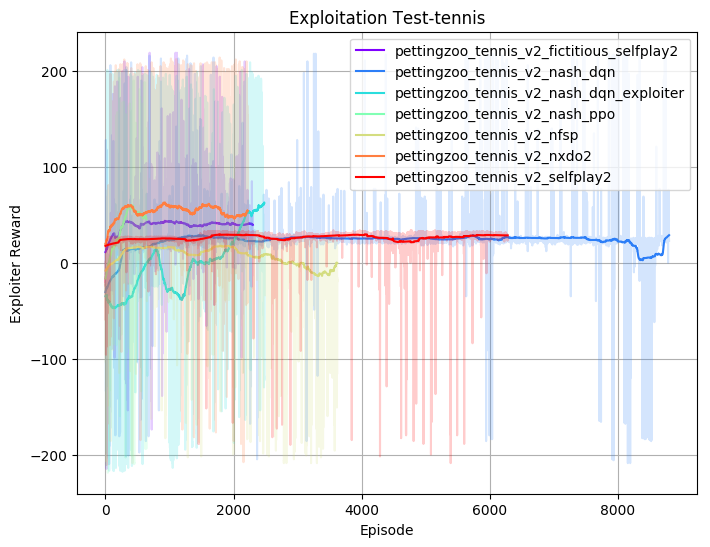

In [42]:
env = 'tennis'
folder = 'log/20211205_2243_exploit/'
files = ! ls $folder
print(files)
colors = cm.rainbow(np.linspace(0, 1, 7))
# colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
env_files =[f for f in files if env in f]
print(env_files)
plt.rcParams["figure.figsize"] = (8,6)

for f, c in zip(env_files, colors):
    data = load_data(f)
    method = f.split('v1_')[-1]
    plot(data['episode_reward'], method, c, agent_to_plot, smooth_radius=200)

plt.legend()
plt.grid()
plt.title(f'Exploitation Test-{env}')
plt.xlabel('Episode')
plt.ylabel('Exploiter Reward')
savepath=f'generated_img/compare_exploitation_{env}.pdf'
plt.savefig(savepath, bbox_inches='tight',)

In [36]:
import time 

t0 = time.time()

for _ in range(int(1e6)):
    a=[1]

    try:
        b=a*[1,2]
    except:
        b=np.array(a)*[1,2]

    try:
        b=a*[1,2]
    except:
        b=np.array(a)*[1,2]

t1 = time.time()

print(b, t1-t0)

[1 2] 4.987084150314331


In [37]:
import time 

t0 = time.time()

for _ in range(int(1e6)):
    a=[1]
    if isinstance(a, list):
        b=np.array(a)*[1,2]
    else:
        b=a*[1,2]

    if isinstance(a, list):
        b=np.array(a)*[1,2]
    else:
        b=a*[1,2]


t1 = time.time()

print(b, t1-t0)

[1 2] 4.089431047439575
